In [2]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [13]:
import csv
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose

action_label = "sentarseFrente"

video_path = 'sentarseFrente.mp4'
cap = cv2.VideoCapture(video_path)

video_name = video_path.split('/')[-1]

frame_count = 0

with open('sentarseFrente.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    header = ['label', 'frame_number', 'timestamp', 'video_name']
    for i in range(33):
        header += [f'x{i}', f'y{i}', f'z{i}']
    writer.writerow(header)

    with mp_pose.Pose() as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            results = pose.process(rgb_frame)

            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark

                timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
                row = [action_label, frame_count, timestamp, video_name]

                for landmark in landmarks:
                    row.append(landmark.x)
                    row.append(landmark.y)
                    row.append(landmark.z)

                writer.writerow(row)

            frame_count += 1

cap.release()
cv2.destroyAllWindows()


In [14]:
import os
import pandas as pd

# Ruta de la carpeta donde tienes tus archivos CSV
carpeta_csv = './'

# Lista para almacenar todos los DataFrames
dataframes = []

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(carpeta_csv):
    if archivo.endswith('.csv'):
        # Leer cada archivo CSV y agregarlo a la lista de DataFrames
        df = pd.read_csv(os.path.join(carpeta_csv, archivo))
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame resultante en un nuevo archivo CSV
df_concatenado.to_csv('todos_los_datos.csv', index=False)

print('Todos los archivos CSV han sido combinados en "todos_los_datos.csv"')


Todos los archivos CSV han sido combinados en "todos_los_datos.csv"


#EDA

## Vista preliminar del dataset

In [15]:
# Escribe el código necesario para importar pandas, matplotlib (pyplot en específico), numpy y seaborn. Además, agrega los alias de pd, plt, np y sb, respectivamente.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [17]:
ruta_csv = 'todos_los_datos.csv'

df = pd.read_csv(ruta_csv)

In [18]:
# Averigua el tamaño del dataset.
df.shape

(1137, 103)

In [19]:
# Revisa los tipos de datos y la cantidad de valores no nulos para cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Columns: 103 entries, label to z32
dtypes: float64(100), int64(1), object(2)
memory usage: 915.1+ KB


In [20]:
# Visualiza las primeras cinco filas del data frame.
df.head(5)

label  frame_number  timestamp          video_name        x0  \
0  girarIzquierda             0   0.000000  girarIzquierda.mp4  0.440395   
1  girarIzquierda             1   0.033333  girarIzquierda.mp4  0.439970   
2  girarIzquierda             2   0.066667  girarIzquierda.mp4  0.439112   
3  girarIzquierda             3   0.100000  girarIzquierda.mp4  0.438850   
4  girarIzquierda             4   0.133333  girarIzquierda.mp4  0.438796   

         y0        z0        x1        y1        z1  ...       z29       x30  \
0  0.306961 -0.486696  0.451896  0.298447 -0.460199  ...  0.444566  0.470184   
1  0.306565 -0.492080  0.451241  0.297767 -0.466289  ...  0.503488  0.470507   
2  0.306054 -0.496951  0.450148  0.297081 -0.472311  ...  0.522113  0.471192   
3  0.305507 -0.500569  0.449833  0.296323 -0.476056  ...  0.526815  0.471432   
4  0.305075 -0.501827  0.449817  0.295564 -0.476534  ...  0.538345  0.471666   

        y30       z30       x31       y31       z31       x32       y32  \
0  0.774867  0.519542  0.557279  0.794665  0.198489  0.406220  0.802338   
1  0.774575  0.561480  0.558773  0.794752  0.259130  0.408258  0.801639   
2  0.774162  0.582305  0.559704  0.794778  0.276920  0.409856  0.800867   
3  0.773714  0.600995  0.560134  0.794792  0.281304  0.410605  0.800200   
4  0.773476  0.613523  0.560280  0.794819  0.292835  0.411298  0.799979   

        z32  
0  0.298050  
1  0.336571  
2  0.357416  
3  0.377403  
4  0.389798  

[5 rows x 103 columns]

In [21]:
# Visualiza las últimas cinco filas del data frame.
df.tail(5)

label  frame_number  timestamp       video_name        x0  \
1132  pararseFrente           111   3.700000  pararFrente.mp4  0.412075   
1133  pararseFrente           112   3.733333  pararFrente.mp4  0.412046   
1134  pararseFrente           113   3.766667  pararFrente.mp4  0.411944   
1135  pararseFrente           114   3.800000  pararFrente.mp4  0.411937   
1136  pararseFrente           115   3.833333  pararFrente.mp4  0.411557   

            y0        z0        x1        y1        z1  ...       z29  \
1132  0.176898 -0.410573  0.428023  0.170470 -0.379065  ...  0.285050   
1133  0.176730 -0.415860  0.427864  0.170419 -0.383952  ...  0.289010   
1134  0.176611 -0.434851  0.427597  0.170384 -0.402251  ...  0.314334   
1135  0.176687 -0.398508  0.427582  0.170408 -0.369269  ...  0.294274   
1136  0.176904 -0.406240  0.427052  0.170475 -0.376024  ...  0.294262   

           x30       y30       z30       x31       y31       z31       x32  \
1132  0.371960  0.853163  0.274807  0.621820  0.872714  0.024962  0.267541   
1133  0.371974  0.852975  0.275376  0.621935  0.872701  0.025918  0.267808   
1134  0.372099  0.852811  0.306950  0.621915  0.872248  0.050802  0.268000   
1135  0.372102  0.852559  0.291335  0.621897  0.871735  0.046977  0.268077   
1136  0.372171  0.852537  0.294508  0.622114  0.871307  0.046257  0.268382   

           y32       z32  
1132  0.888035  0.023978  
1133  0.888066  0.027984  
1134  0.888109  0.053646  
1135  0.888111  0.052051  
1136  0.888106  0.052798  

[5 rows x 103 columns]

In [22]:
df.describe()

frame_number    timestamp           x0           y0           z0  \
count   1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean      84.311346     2.810195     0.425957     0.324484    -0.145194   
std       64.913796     2.163887     0.086387     0.068552     0.286800   
min        0.000000     0.000000     0.049825     0.173078    -0.669725   
25%       35.000000     1.166667     0.403012     0.293687    -0.389617   
50%       71.000000     2.366667     0.439119     0.307824    -0.145766   
75%      110.000000     3.666667     0.475231     0.384151    -0.009205   
max      279.000000     9.300000     0.595567     0.496974     1.098962   

                x1           y1           z1           x2           y2  ...  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000  ...   
mean      0.430180     0.314298    -0.147316     0.433253     0.314225  ...   
std       0.086630     0.067988     0.257104     0.086769     0.067704  ...   
min       0.046200     0.164278    -0.625409     0.049854     0.165022  ...   
25%       0.408445     0.285261    -0.359589     0.410615     0.285364  ...   
50%       0.448022     0.298273    -0.153409     0.451370     0.298142  ...   
75%       0.479925     0.371360    -0.023702     0.481355     0.371462  ...   
max       0.593350     0.491552     1.110413     0.588360     0.489401  ...   

               z29          x30          y30          z30          x31  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean      0.140277     0.462297     0.797022     0.207657     0.477035   
std       0.307084     0.064152     0.036115     0.300315     0.124997   
min      -0.975791     0.328137     0.705603    -1.048413     0.168815   
25%      -0.076428     0.423888     0.773522    -0.002987     0.410197   
50%       0.132903     0.462729     0.792447     0.264837     0.511695   
75%       0.399909     0.501961     0.817149     0.412244     0.571792   
max       0.855844     0.634061     0.872170     0.768167     0.635142   

               y31          z31          x32          y32          z32  
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000  
mean      0.812807     0.006833     0.423069     0.816419     0.077756  
std       0.043716     0.298621     0.101871     0.046296     0.306394  
min       0.715437    -1.091620     0.185957     0.709667    -1.132987  
25%       0.781733    -0.160880     0.385805     0.790830    -0.148879  
50%       0.797496     0.016555     0.428475     0.803134     0.158704  
75%       0.846270     0.246111     0.488002     0.850444     0.312670  
max       0.882247     0.811081     0.638353     0.893808     0.608747  

[8 rows x 101 columns]

In [23]:
# Visualizar los tipos actuales del DataFrame
print(df.dtypes)

label            object
frame_number      int64
timestamp       float64
video_name       object
x0              float64
                 ...   
y31             float64
z31             float64
x32             float64
y32             float64
z32             float64
Length: 103, dtype: object


In [24]:
# Visualiza las columnas actuales del dataframe
print(df.columns)

Index(['label', 'frame_number', 'timestamp', 'video_name', 'x0', 'y0', 'z0',
       'x1', 'y1', 'z1',
       ...
       'z29', 'x30', 'y30', 'z30', 'x31', 'y31', 'z31', 'x32', 'y32', 'z32'],
      dtype='object', length=103)


## Normalización de los datos

Normalizamos las coordenadas dividiéndolas por un valor de referencia, como la distancia entre dos puntos clave (por ejemplo, la distancia entre las caderas).

In [25]:
df_copy = df.copy()

In [27]:
# Normalización de las coordenadas (distancia entre caderas como referencia)
def normalize_landmarks(df):
    # x23, y23 y x24, y24 son las coordenadas de las caderas derecha e izquierda
    df['hip_distance'] = np.sqrt((df['x24'] - df['x23'])**2 + (df['y24'] - df['y23'])**2)

    for i in range(33):
        df[f'x{i}_norm'] = df[f'x{i}'] / df['hip_distance']
        df[f'y{i}_norm'] = df[f'y{i}'] / df['hip_distance']
        df[f'z{i}_norm'] = df[f'z{i}'] / df['hip_distance']

    return df

df_copy = normalize_landmarks(df)

df_copy.head()


label  frame_number  timestamp          video_name        x0  \
0  girarIzquierda             0   0.000000  girarIzquierda.mp4  0.440395   
1  girarIzquierda             1   0.033333  girarIzquierda.mp4  0.439970   
2  girarIzquierda             2   0.066667  girarIzquierda.mp4  0.439112   
3  girarIzquierda             3   0.100000  girarIzquierda.mp4  0.438850   
4  girarIzquierda             4   0.133333  girarIzquierda.mp4  0.438796   

         y0        z0        x1        y1        z1  ...  z29_norm  x30_norm  \
0  0.306961 -0.486696  0.451896  0.298447 -0.460199  ...  3.952343  4.180097   
1  0.306565 -0.492080  0.451241  0.297767 -0.466289  ...  4.467466  4.174823   
2  0.306054 -0.496951  0.450148  0.297081 -0.472311  ...  4.624749  4.173700   
3  0.305507 -0.500569  0.449833  0.296323 -0.476056  ...  4.662966  4.172759   
4  0.305075 -0.501827  0.449817  0.295564 -0.476534  ...  4.758690  4.169283   

   y30_norm  z30_norm  x31_norm  y31_norm  z31_norm  x32_norm  y32_norm  \
0  6.888831  4.618903  4.954400  7.064844  1.764631  3.611433  7.133061   
1  6.872830  4.982030  4.958014  7.051858  2.299271  3.622488  7.112971   
2  6.857340  5.157914  4.957718  7.039952  2.452887  3.630401  7.093885   
3  6.848332  5.319555  4.957886  7.034900  2.489893  3.634364  7.082771   
4  6.837129  5.423224  4.952588  7.025789  2.588511  3.635662  7.071399   

   z32_norm  
0  2.649765  
1  2.986408  
2  3.165906  
3  3.340489  
4  3.445611  

[5 rows x 203 columns]

## Filtrado de las posiciones
Los datos obtenidos de MediaPipe pueden tener ruido debido al seguimiento de las articulaciones.

In [34]:
# Suavizado de las coordenadas usando un filtro de media móvil
def smooth_landmarks(df, window_size=5):
    for i in range(33):
        df_copy[f'x{i}_smooth'] = df[f'x{i}_norm'].rolling(window=window_size).mean()
        df_copy[f'y{i}_smooth'] = df[f'y{i}_norm'].rolling(window=window_size).mean()
        df_copy[f'z{i}_smooth'] = df[f'z{i}_norm'].rolling(window=window_size).mean()

    return df

# Aplicar suavizado al DataFrame normalizado
df_copy = smooth_landmarks(df_copy)

In [35]:
def smooth_series(series, window_size=5):
    return series.rolling(window=window_size, min_periods=1, center=True).mean()

for col in df.columns:
    if '_smooth' in col:  #
        df_copy[col] = smooth_series(df_copy[col])

df_copy = df_copy.interpolate(method='linear', axis=0)

df_copy.fillna(method='ffill', inplace=True)
df_copy.fillna(method='bfill', inplace=True)

# Revisar si aún quedan NaNs
print(df_copy.isna().sum())


label           0
frame_number    0
timestamp       0
video_name      0
x0              0
               ..
y31_smooth      0
z31_smooth      0
x32_smooth      0
y32_smooth      0
z32_smooth      0
Length: 302, dtype: int64


<ipython-input-35-da7b914bd5b5>:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_copy = df_copy.interpolate(method='linear', axis=0)
<ipython-input-35-da7b914bd5b5>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.fillna(method='ffill', inplace=True)  # Rellena hacia adelante
<ipython-input-35-da7b914bd5b5>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.fillna(method='bfill', inplace=True)  # Rellena hacia atrás


In [36]:
# Ver los primeros registros para verificar
df_copy.head()

label  frame_number  timestamp          video_name        x0  \
0  girarIzquierda             0   0.000000  girarIzquierda.mp4  0.440395   
1  girarIzquierda             1   0.033333  girarIzquierda.mp4  0.439970   
2  girarIzquierda             2   0.066667  girarIzquierda.mp4  0.439112   
3  girarIzquierda             3   0.100000  girarIzquierda.mp4  0.438850   
4  girarIzquierda             4   0.133333  girarIzquierda.mp4  0.438796   

         y0        z0        x1        y1        z1  ...  z29_smooth  \
0  0.306961 -0.486696  0.451896  0.298447 -0.460199  ...    4.493243   
1  0.306565 -0.492080  0.451241  0.297767 -0.466289  ...    4.493243   
2  0.306054 -0.496951  0.450148  0.297081 -0.472311  ...    4.493243   
3  0.305507 -0.500569  0.449833  0.296323 -0.476056  ...    4.583143   
4  0.305075 -0.501827  0.449817  0.295564 -0.476534  ...    4.640656   

   x30_smooth  y30_smooth  z30_smooth  x31_smooth  y31_smooth  z31_smooth  \
0    4.174132    6.860893    5.100325    4.956121    7.043469    2.319039   
1    4.174132    6.860893    5.100325    4.956121    7.043469    2.319039   
2    4.174132    6.860893    5.100325    4.956121    7.043469    2.319039   
3    4.172591    6.854597    5.186110    4.955252    7.038508    2.411683   
4    4.171073    6.848674    5.249271    4.953702    7.033744    2.470613   

   x32_smooth  y32_smooth  z32_smooth  
0    3.626870    7.098817    3.117636  
1    3.626870    7.098817    3.117636  
2    3.626870    7.098817    3.117636  
3    3.628826    7.091508    3.203210  
4    3.629766    7.084799    3.267789  

[5 rows x 302 columns]

In [41]:
# Mostrar un ejemplo comparando los datos normalizados con los suavizados
cols_to_compare = ['x0_norm', 'x0_smooth', 'y0_norm', 'y0_smooth', 'z0_norm', 'z0_smooth']
print(df_copy[cols_to_compare].head(10))


    x0_norm  x0_smooth   y0_norm  y0_smooth   z0_norm  z0_smooth
0  3.915262   3.894354  2.728985   2.712184 -4.326890  -4.392312
1  3.903864   3.894354  2.720160   2.712184 -4.366238  -4.392312
2  3.889544   3.894354  2.710949   2.712184 -4.401872  -4.392312
3  3.884370   3.890107  2.704122   2.708138 -4.430664  -4.402558
4  3.878731   3.886245  2.696704   2.704114 -4.435895  -4.409973
5  3.872787   3.883025  2.688525   2.700236 -4.429346  -4.415660
6  3.867176   3.880109  2.680032   2.696399 -4.426246  -4.419587
7  3.863761   3.874209  2.673618   2.688771 -4.441447  -4.431413
8  3.859760   3.869089  2.666380   2.681269 -4.443542  -4.441747
9  3.860806   3.864648  2.661673   2.673635 -4.516638  -4.451176


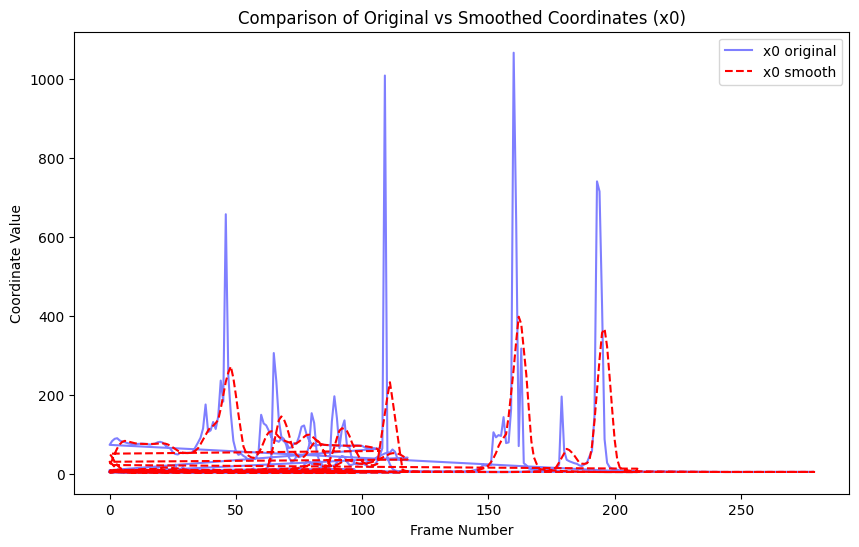

In [42]:
import matplotlib.pyplot as plt

# Visualizar las coordenadas normalizadas y suavizadas para la articulación 0
plt.figure(figsize=(10, 6))

plt.plot(df_copy['frame_number'], df_copy['x0_norm'], label='x0 original', color='blue', alpha=0.5)
plt.plot(df_copy['frame_number'], df_copy['x0_smooth'], label='x0 smooth', color='red', linestyle='--')

plt.xlabel('Frame Number')
plt.ylabel('Coordinate Value')
plt.title('Comparison of Original vs Smoothed Coordinates (x0)')
plt.legend()
plt.show()


In [43]:
# Calcular la desviación estándar antes y después del suavizado
print("Original x0 desviación:", df_copy['x0_norm'].std())
print("Smoothed x0 desviación:", df_copy['x0_smooth'].std())


Original x0 std deviation: 67.98982695891681
Smoothed x0 std deviation: 45.52013866508335


## Generación de caracteristicas utiles

#### A) Velocidad de las articulaciones
La velocidad se puede calcular como la diferencia de las coordenadas entre dos fotogramas consecutivos.

In [45]:
# Cálculo de la velocidad de las articulaciones (cambio de posición entre fotogramas)
def calculate_joint_velocity(df):
    for i in range(33):
        df_copy[f'velocity_x{i}'] = df_copy[f'x{i}_smooth'].diff() / df_copy['timestamp'].diff()
        df_copy[f'velocity_y{i}'] = df_copy[f'y{i}_smooth'].diff() / df_copy['timestamp'].diff()
        df_copy[f'velocity_z{i}'] = df_copy[f'z{i}_smooth'].diff() / df_copy['timestamp'].diff()

    return df

df_copy = calculate_joint_velocity(df_copy)
df_copy.fillna(0, inplace=True)
df_copy.head()


label  frame_number  timestamp          video_name        x0  \
0  girarIzquierda             0   0.000000  girarIzquierda.mp4  0.440395   
1  girarIzquierda             1   0.033333  girarIzquierda.mp4  0.439970   
2  girarIzquierda             2   0.066667  girarIzquierda.mp4  0.439112   
3  girarIzquierda             3   0.100000  girarIzquierda.mp4  0.438850   
4  girarIzquierda             4   0.133333  girarIzquierda.mp4  0.438796   

         y0        z0        x1        y1        z1  ...  velocity_z29  \
0  0.306961 -0.486696  0.451896  0.298447 -0.460199  ...      0.000000   
1  0.306565 -0.492080  0.451241  0.297767 -0.466289  ...      0.000000   
2  0.306054 -0.496951  0.450148  0.297081 -0.472311  ...      0.000000   
3  0.305507 -0.500569  0.449833  0.296323 -0.476056  ...      2.697017   
4  0.305075 -0.501827  0.449817  0.295564 -0.476534  ...      1.725385   

   velocity_x30  velocity_y30  velocity_z30  velocity_x31  velocity_y31  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1      0.000000      0.000000      0.000000      0.000000      0.000000   
2      0.000000      0.000000      0.000000      0.000000      0.000000   
3     -0.046248     -0.188879      2.573559     -0.026066     -0.148827   
4     -0.045529     -0.177676      1.894811     -0.046492     -0.142904   

   velocity_z31  velocity_x32  velocity_y32  velocity_z32  
0      0.000000      0.000000      0.000000      0.000000  
1      0.000000      0.000000      0.000000      0.000000  
2      0.000000      0.000000      0.000000      0.000000  
3      2.779326      0.058701     -0.219287      2.567243  
4      1.767889      0.028186     -0.201269      1.937352  

[5 rows x 401 columns]

#### B) Ángulos relativos entre articulaciones

Podemos calcular los ángulos entre tres puntos clave. Un ejemplo de esto es calcular el ángulo del codo, usando las posiciones de la muñeca, codo y hombro.

In [46]:
# Función para calcular el ángulo entre tres puntos
def calculate_angle(a, b, c):
    ab = np.array(a) - np.array(b)
    cb = np.array(c) - np.array(b)

    cos_angle = np.dot(ab, cb) / (np.linalg.norm(ab) * np.linalg.norm(cb))
    angle = np.arccos(cos_angle)

    return np.degrees(angle)

# Cálculo de ángulos entre codo, hombro y muñeca
def calculate_joint_angles(df):
    df_copy['right_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(
        [row['x16_smooth'], row['y16_smooth'], row['z16_smooth']],
        [row['x14_smooth'], row['y14_smooth'], row['z14_smooth']],
        [row['x12_smooth'], row['y12_smooth'], row['z12_smooth']]
    ), axis=1)

    df_copy['left_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(
        [row['x15_smooth'], row['y15_smooth'], row['z15_smooth']],
        [row['x13_smooth'], row['y13_smooth'], row['z13_smooth']],
        [row['x11_smooth'], row['y11_smooth'], row['z11_smooth']]
    ), axis=1)

    return df

df_copy = calculate_joint_angles(df_copy)

df_copy.head()


<ipython-input-46-34d61f9c2039>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['right_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(
<ipython-input-46-34d61f9c2039>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['left_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(


label  frame_number  timestamp          video_name        x0  \
0  girarIzquierda             0   0.000000  girarIzquierda.mp4  0.440395   
1  girarIzquierda             1   0.033333  girarIzquierda.mp4  0.439970   
2  girarIzquierda             2   0.066667  girarIzquierda.mp4  0.439112   
3  girarIzquierda             3   0.100000  girarIzquierda.mp4  0.438850   
4  girarIzquierda             4   0.133333  girarIzquierda.mp4  0.438796   

         y0        z0        x1        y1        z1  ...  velocity_y30  \
0  0.306961 -0.486696  0.451896  0.298447 -0.460199  ...      0.000000   
1  0.306565 -0.492080  0.451241  0.297767 -0.466289  ...      0.000000   
2  0.306054 -0.496951  0.450148  0.297081 -0.472311  ...      0.000000   
3  0.305507 -0.500569  0.449833  0.296323 -0.476056  ...     -0.188879   
4  0.305075 -0.501827  0.449817  0.295564 -0.476534  ...     -0.177676   

   velocity_z30  velocity_x31  velocity_y31  velocity_z31  velocity_x32  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1      0.000000      0.000000      0.000000      0.000000      0.000000   
2      0.000000      0.000000      0.000000      0.000000      0.000000   
3      2.573559     -0.026066     -0.148827      2.779326      0.058701   
4      1.894811     -0.046492     -0.142904      1.767889      0.028186   

   velocity_y32  velocity_z32  right_elbow_angle  left_elbow_angle  
0      0.000000      0.000000         101.634133        135.323823  
1      0.000000      0.000000         101.634133        135.323823  
2      0.000000      0.000000         101.634133        135.323823  
3     -0.219287      2.567243         101.830893        135.258601  
4     -0.201269      1.937352         101.807506        135.298392  

[5 rows x 403 columns]

#### C) Inclinación del tronco

Podemos calcular la inclinación del tronco usando las coordenadas de los hombros y la cadera.

In [47]:
# Cálculo de la inclinación del tronco (ángulo entre hombros y cadera)
def calculate_trunk_inclination(df):
    df_copy['trunk_inclination'] = df_copy.apply(lambda row: calculate_angle(
        [row['x11_smooth'], row['y11_smooth'], row['z11_smooth']],
        [row['x23_smooth'], row['y23_smooth'], row['z23_smooth']],
        [row['x12_smooth'], row['y12_smooth'], row['z12_smooth']]
    ), axis=1)

    return df

df_copy = calculate_trunk_inclination(df_copy)

df_copy.head()


<ipython-input-47-1a655ccebbb8>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['trunk_inclination'] = df_copy.apply(lambda row: calculate_angle(


label  frame_number  timestamp          video_name        x0  \
0  girarIzquierda             0   0.000000  girarIzquierda.mp4  0.440395   
1  girarIzquierda             1   0.033333  girarIzquierda.mp4  0.439970   
2  girarIzquierda             2   0.066667  girarIzquierda.mp4  0.439112   
3  girarIzquierda             3   0.100000  girarIzquierda.mp4  0.438850   
4  girarIzquierda             4   0.133333  girarIzquierda.mp4  0.438796   

         y0        z0        x1        y1        z1  ...  velocity_z30  \
0  0.306961 -0.486696  0.451896  0.298447 -0.460199  ...      0.000000   
1  0.306565 -0.492080  0.451241  0.297767 -0.466289  ...      0.000000   
2  0.306054 -0.496951  0.450148  0.297081 -0.472311  ...      0.000000   
3  0.305507 -0.500569  0.449833  0.296323 -0.476056  ...      2.573559   
4  0.305075 -0.501827  0.449817  0.295564 -0.476534  ...      1.894811   

   velocity_x31  velocity_y31  velocity_z31  velocity_x32  velocity_y32  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1      0.000000      0.000000      0.000000      0.000000      0.000000   
2      0.000000      0.000000      0.000000      0.000000      0.000000   
3     -0.026066     -0.148827      2.779326      0.058701     -0.219287   
4     -0.046492     -0.142904      1.767889      0.028186     -0.201269   

   velocity_z32  right_elbow_angle  left_elbow_angle  trunk_inclination  
0      0.000000         101.634133        135.323823          67.729443  
1      0.000000         101.634133        135.323823          67.729443  
2      0.000000         101.634133        135.323823          67.729443  
3      2.567243         101.830893        135.258601          67.713279  
4      1.937352         101.807506        135.298392          67.711836  

[5 rows x 404 columns]

## Diagramas de caja (Boxplots)

In [48]:
# Genera un gráfico de caja (boxplot) para cada columna en el data frame auto_clean_df.
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(220, 180))

for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns)//3 + 1, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()

plt.show()